## Visualization With Titanic Dataset

![](https://images.squarespace-cdn.com/content/v1/5006453fe4b09ef2252ba068/1351392437993-BV9HK0L2V72X9FA05IOP/ke17ZwdGBToddI8pDm48kNWCohGJSet_CTOduKgSq_IUqsxRUqqbr1mOJYKfIPR7LoDQ9mXPOjoJoqy81S2I8N_N4V1vUb5AoIIIbLZhVYxCRW4BPu10St3TBAUQYVKcq9E8CIbGv7FsN6c8xqWQM05n26OV6V51zLkOg8VQq3jPVEm2DFIE48zJj5Gl4vDf/Titanic_Blueprints_Design+%2815%29.gif)

In [1]:
!pip install seaborn==0.11.0

     |████████████████████████████████| 283 kB 9.7 MB/s eta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('/kaggle/input/titanic/train.csv')
data.shape

(891, 12)

## Timeline Visualization

- A **Timeline** is a graphical way of displaying a list of events in chronological order. 
- line + scatter + **stem plot**

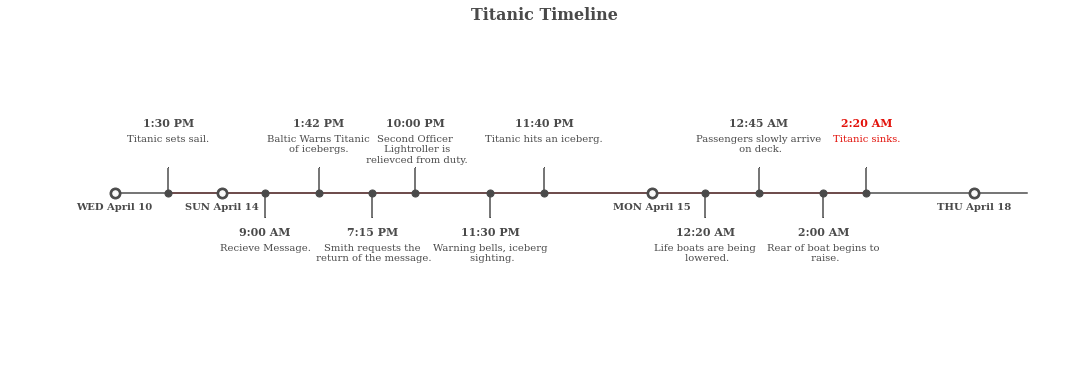

In [4]:
from datetime import datetime


tl_dates = [
    "WED April 10",
    "SUN April 14",
    "MON April 15",
    "THU April 18"
]

tl_x = [1, 2, 6, 9]

tl_sub_x = [1.5, 2.4, 2.9, 3.4, 3.8, 4.5, 5.0, 6.5, 7, 7.6, 8]
tl_sub_times = [
    "1:30 PM",
    "9:00 AM",
    "1:42 PM",
    "7:15 PM",
    "10:00 PM",
    "11:30 PM",
    "11:40 PM",
    "12:20 AM",
    "12:45 AM",
    "2:00 AM",
    "2:20 AM",
]

tl_text = [
    "Titanic sets sail.",
    "Recieve Message.",
    "Baltic Warns Titanic\nof icebergs.", 
    "Smith requests the\n return of the message.",
    "Second Officer\n Lightroller is\n relievced from duty.",
    "Warning bells, iceberg\n sighting.",
    "Titanic hits an iceberg.",
    "Life boats are being\n lowered.",
    "Passengers slowly arrive\n on deck.",
    "Rear of boat begins to\n raise.",
    "Titanic sinks."
]

# Set figure & Axes
fig, ax = plt.subplots(figsize=(15, 5), constrained_layout=True)
ax.set_ylim(-2, 2)
ax.set_xlim(0, 10)


# Timeline : line
ax.axhline(0, xmin=0.1, xmax=0.95, c='#4a4a4a', zorder=1)
# Timeline : Date Points
ax.scatter(tl_x, np.zeros(len(tl_x)), s=120, c='#4a4a4a', zorder=2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='#fafafa', zorder=3)
# Timeline : Time Points
ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s=50, c='#4a4a4a',zorder=4)

# Date Text
for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.2, date, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a')
    

# Stemplot : vertical line
levels = np.zeros(len(tl_sub_x))    
levels[::2] = 0.3
levels[1::2] = -0.3
markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection=True)    
plt.setp(baseline, zorder=0)
plt.setp(markerline, marker=',', color='#4a4a4a')
plt.setp(stemline, color='#4a4a4a')

# Text
for idx, x, time, txt in zip(range(1, len(tl_sub_x)+1), tl_sub_x, tl_sub_times, tl_text):
    ax.text(x, 1.3*(idx%2)-0.5, time, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a' if idx!=len(tl_sub_x) else '#e3120b', fontsize=11)
    
    ax.text(x, 1.3*(idx%2)-0.6, txt, va='top', ha='center', 
        fontfamily='serif',color='#4a4a4a' if idx!=len(tl_sub_x) else '#e3120b')

# Spine
for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

# Ticks    
ax.set_xticks([]) 
ax.set_yticks([]) 

# Title
ax.set_title("Titanic Timeline", fontweight="bold", fontfamily='serif', fontsize=16, color='#4a4a4a')

plt.show()

## DENSITY PLOT

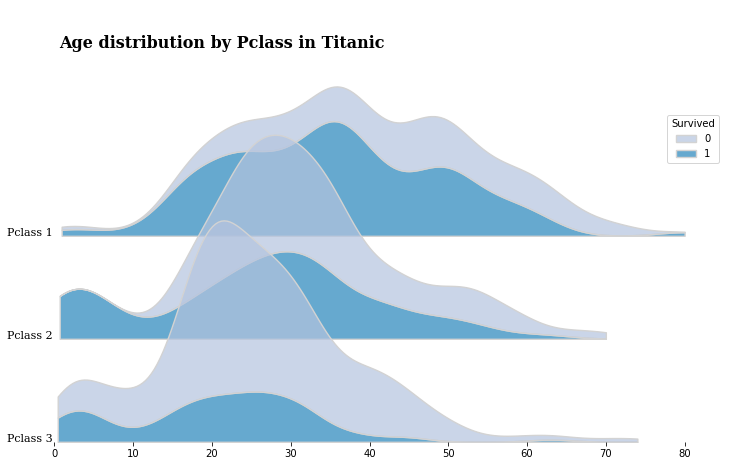

In [7]:
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(3,1)
gs.update(hspace= -0.55)

axes = list()
colors = ["#022133", "#5c693b", "#51371c"]

for idx, cls, c in zip(range(3), sorted(data['Pclass'].unique()), colors):
    axes.append(fig.add_subplot(gs[idx, 0]))
    
    # you can also draw density plot with matplotlib + scipy.
    sns.kdeplot(x='Age', data=data[data['Pclass']==cls], 
                fill=True, ax=axes[idx], cut=0, bw_method=0.25, 
                lw=1.4, edgecolor='lightgray', hue='Survived', 
                multiple="stack", palette='PuBu', alpha=0.7
               ) 
    
    axes[idx].set_ylim(0, 0.04)
    axes[idx].set_xlim(0, 85)
    
    axes[idx].set_yticks([])
    if idx != 2 : axes[idx].set_xticks([])
    axes[idx].set_ylabel('')
    axes[idx].set_xlabel('')
    
    spines = ["top","right","left","bottom"]
    for s in spines:
        axes[idx].spines[s].set_visible(False)
        
    axes[idx].patch.set_alpha(0)
    axes[idx].text(-0.2,0,f'Pclass {cls}',fontweight="light", fontfamily='serif', fontsize=11,ha="right")
    if idx != 1 : axes[idx].get_legend().remove()
        
fig.text(0.13,0.81,"Age distribution by Pclass in Titanic", fontweight="bold", fontfamily='serif', fontsize=16)

plt.show()    

## BAR PLOT

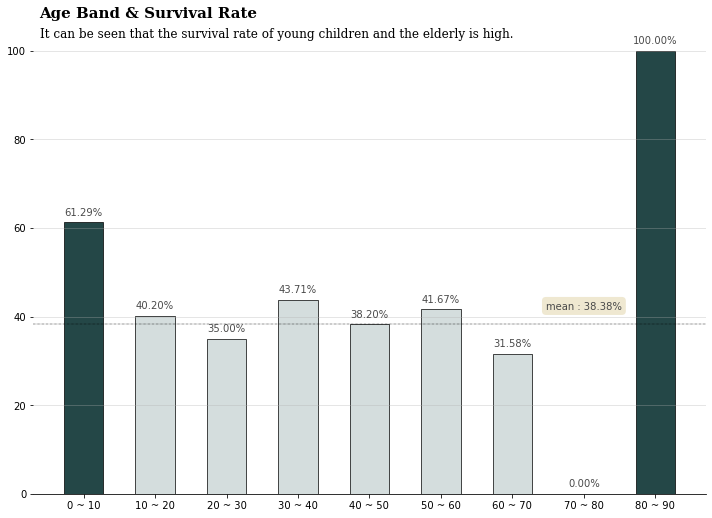

In [9]:
def age_band(num):
    for i in range(1, 100):
        if num < 10*i :  return f'{(i-1) * 10} ~ {i*10}'

data['age_band'] = data['Age'].apply(age_band)
titanic_age = data[['age_band', 'Survived']].groupby('age_band')['Survived'].value_counts().sort_index().unstack().fillna(0)
titanic_age['Survival rate'] = titanic_age[1] / (titanic_age[0] + titanic_age[1]) * 100

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

color_map = ['#d4dddd' for _ in range(9)]
color_map[0] = color_map[8] = '#244747' # color highlight

ax.bar(titanic_age['Survival rate'].index, titanic_age['Survival rate'], 
       color=color_map, width=0.55, 
       edgecolor='black', 
       linewidth=0.7)



for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)


# Annotation Part
for i in titanic_age['Survival rate'].index:
    ax.annotate(f"{titanic_age['Survival rate'][i]:.02f}%", 
                   xy=(i, titanic_age['Survival rate'][i] + 2.3),
                   va = 'center', ha='center',fontweight='light', 
                   color='#4a4a4a')


# mean line + annotation
mean = data['Survived'].mean() *100
ax.axhline(mean ,color='black', linewidth=0.4, linestyle='dashdot')
ax.annotate(f"mean : {mean :.4}%", 
            xy=('70 ~ 80', mean + 4),
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=0))
    

# Title & Subtitle    
fig.text(0.06, 1, 'Age Band & Survival Rate', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.06, 0.96, 'It can be seen that the survival rate of young children and the elderly is high.', fontsize=12, fontweight='light', fontfamily='serif')

grid_y_ticks = np.arange(0, 101, 20)
ax.set_yticks(grid_y_ticks)
ax.grid(axis='y', linestyle='-', alpha=0.4)

plt.tight_layout()
plt.show()

## Survival Rate

In [10]:
survival_rate = data.groupby(['Sex']).mean()[['Survived']]
male_rate = survival_rate.loc['male']
female_rate = survival_rate.loc['female']
display(survival_rate)

,Survived
Sex,
female,0.742038
male,0.188908


In [11]:
male_pos = np.random.uniform(0, male_rate, len(data[(data['Sex']=='male') & (data['Survived']==1)]))
male_neg = np.random.uniform(male_rate, 1, len(data[(data['Sex']=='male') & (data['Survived']==0)]))
female_pos = np.random.uniform(0, female_rate, len(data[(data['Sex']=='female') & (data['Survived']==1)]))
female_neg = np.random.uniform(female_rate, 1, len(data[(data['Sex']=='female') & (data['Survived']==0)]))

## STRIP PLOT

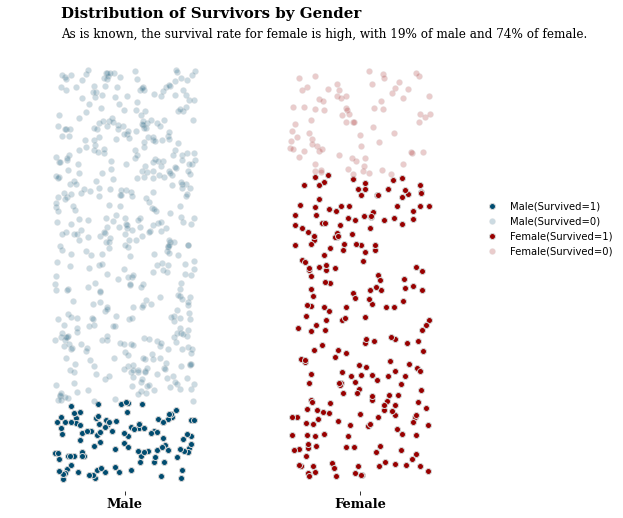

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(9, 7))

np.random.seed(42)

# Male Stripplot
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_pos)), male_pos, color='#004c70', edgecolor='lightgray', label='Male(Survived=1)')
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_neg)), male_neg, color='#004c70', edgecolor='lightgray', alpha=0.2, label='Male(Survived=0)')

# Female Stripplot
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_pos)), female_pos, color='#990000', edgecolor='lightgray', label='Female(Survived=1)')
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_neg)), female_neg, color='#990000', edgecolor='lightgray', alpha=0.2, label='Female(Survived=0)')

# Set Figure & Axes
ax.set_xlim(-0.5, 2.0)
ax.set_ylim(-0.03, 1.1)

# Ticks
ax.set_xticks([0, 1])
ax.set_xticklabels(['Male', 'Female'], fontweight='bold', fontfamily='serif', fontsize=13)
ax.set_yticks([], minor=False)
ax.set_ylabel('')

# Spines
for s in ["top","right","left", 'bottom']:
    ax.spines[s].set_visible(False)


# Title & Explanation
fig.text(0.1, 1, 'Distribution of Survivors by Gender', fontweight='bold', fontfamily='serif', fontsize=15)    
fig.text(0.1, 0.96, 'As is known, the survival rate for female is high, with 19% of male and 74% of female.', fontweight='light', fontfamily='serif', fontsize=12)    

ax.legend(loc=(0.8, 0.5), edgecolor='None')
plt.tight_layout()
plt.show()

## HEATMAP

In [14]:
data['Sex'] = data['Sex'].map({'male':0, 'female':1})
data['Embarked'] = data['Embarked'].fillna('S')
data['Embarked'] = data['Embarked'].map({'S':0, 'C':1, 'Q':2})
data['Family'] = data['SibSp'] + data['Parch']
data = data[[col for col in data.columns if col !='Survived']+ ['Survived']]  
corr = data.corr()
corr

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Survived
PassengerId,1.000000,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658,-0.030467,-0.040143,-0.005007
Pclass,-0.035144,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,0.045702,0.065997,-0.338481
Sex,-0.042939,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,0.116569,0.200988,0.543351
Age,0.036847,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,0.010171,-0.301914,-0.077221
SibSp,-0.057527,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,-0.059961,0.890712,-0.035322
Parch,-0.001652,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,-0.078665,0.783111,0.081629
Fare,0.012658,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,0.062142,0.217138,0.257307
Embarked,-0.030467,0.045702,0.116569,0.010171,-0.059961,-0.078665,0.062142,1.000000,-0.080281,0.106811
Family,-0.040143,0.065997,0.200988,-0.301914,0.890712,0.783111,0.217138,-0.080281,1.000000,0.016639
Survived,-0.005007,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,0.106811,0.016639,1.000000


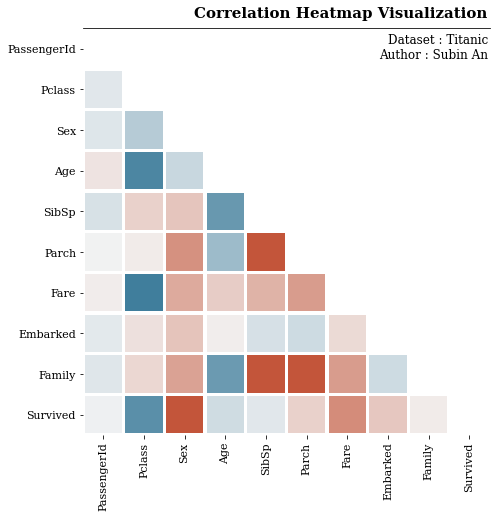

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, 
            square=True, 
            mask=mask,
            linewidth=2.5, 
            vmax=0.4, vmin=-0.4, 
            cmap=cmap, 
            cbar=False, 
            ax=ax)

ax.set_yticklabels(ax.get_xticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.spines['top'].set_visible(True)

fig.text(0.97, 1, 'Correlation Heatmap Visualization', fontweight='bold', fontfamily='serif', fontsize=15, ha='right')    
fig.text(0.97, 0.92, 'Dataset : Titanic\nAuthor : Subin An', fontweight='light', fontfamily='serif', fontsize=12, ha='right')    

plt.tight_layout()
plt.show()

## STEM PLOT 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


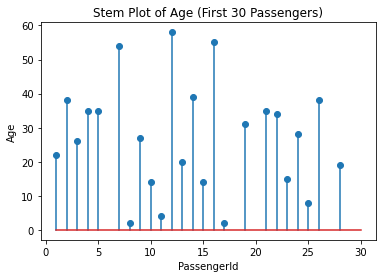

In [17]:
from matplotlib import pyplot as plt

x = data['PassengerId'][:30]
y = data['Age'][:30]

plt.stem(x, y)
plt.title('Stem Plot of Age (First 30 Passengers)')
plt.xlabel('PassengerId')
plt.ylabel('Age')
plt.show()

## BAR CHART

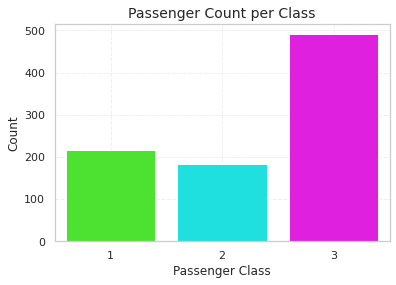

In [40]:
sns.countplot(data=data, x='Pclass', palette=['#39FF14', '#00FFFF', '#FF00FF'])  # Neon green, cyan, magenta
plt.title('Passenger Count per Class', fontsize=14)
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

## 3D PLOT

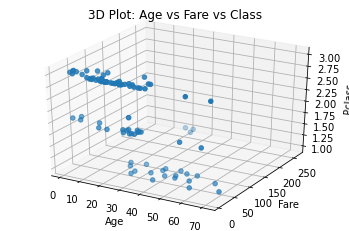

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

sample = data[['Age', 'Fare', 'Pclass']].dropna().head(100)
ax.scatter(sample['Age'], sample['Fare'], sample['Pclass'])

ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_zlabel('Pclass')
plt.title('3D Plot: Age vs Fare vs Class')
plt.show()

## VIOLIN PLOT 

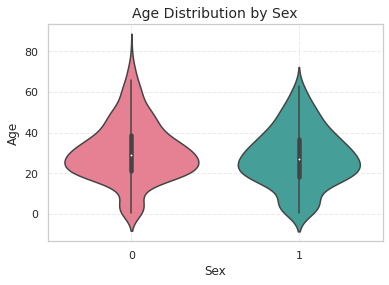

In [39]:
sns.violinplot(x='Sex', y='Age', data=data, palette='husl')
plt.title('Age Distribution by Sex', fontsize=14)
plt.xlabel('Sex')
plt.ylabel('Age')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

## JOINT PLOT

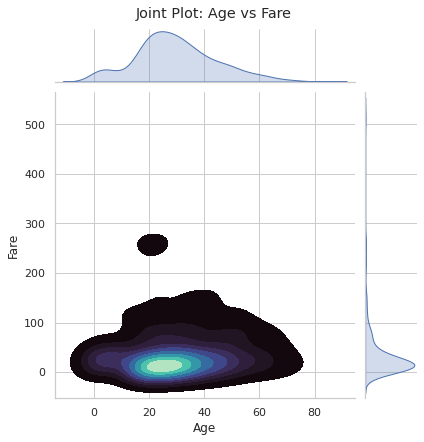

In [26]:
# Optional: Clean data (dropna for numeric columns used in plots)
data_clean = data[['Age', 'Fare', 'Pclass', 'Survived']].dropna()

# Set Seaborn style
sns.set(style="whitegrid")
sns.jointplot(data=data_clean, x='Age', y='Fare', kind='kde', fill=True, cmap='mako')
plt.suptitle('Joint Plot: Age vs Fare', y=1.02)
plt.show()

## PAIR PLOT 

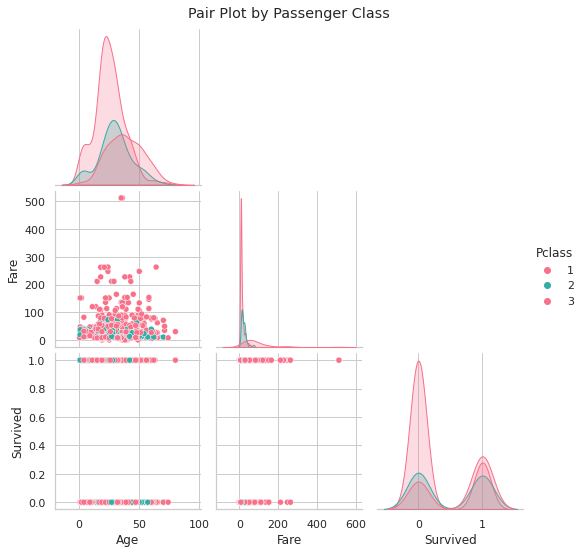

In [31]:
sns.pairplot(data_clean, hue='Pclass', palette='husl', corner=True)
plt.suptitle('Pair Plot by Passenger Class', y=1.02)
plt.show()

## FACE GRID

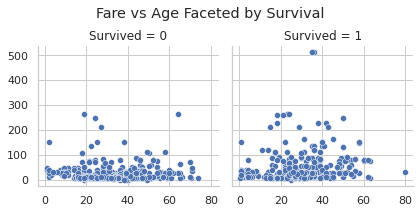

In [30]:
g = sns.FacetGrid(data_clean, col="Survived", palette='coolwarm')
g.map_dataframe(sns.scatterplot, x='Age', y='Fare')
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Fare vs Age Faceted by Survival')
plt.show()

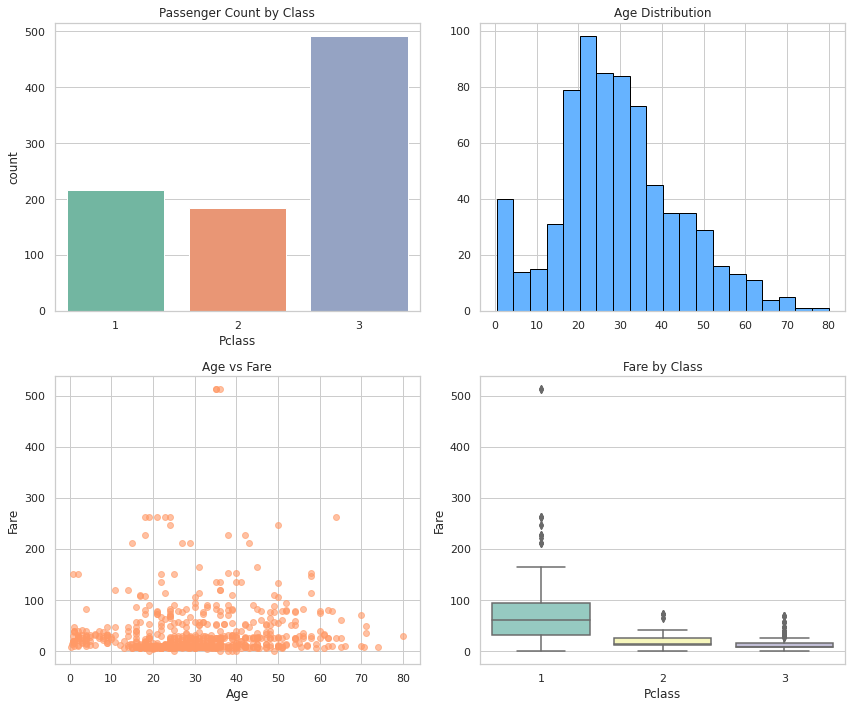

In [32]:
plt.figure(figsize=(12, 10))

# Plot 1: Count of Pclass
plt.subplot(2, 2, 1)
sns.countplot(data=data, x='Pclass', palette='Set2')
plt.title('Passenger Count by Class')

# Plot 2: Age Distribution
plt.subplot(2, 2, 2)
plt.hist(data['Age'].dropna(), bins=20, color='#66b3ff', edgecolor='black')
plt.title('Age Distribution')

# Plot 3: Scatter of Age vs Fare
plt.subplot(2, 2, 3)
plt.scatter(data['Age'], data['Fare'], alpha=0.6, color='#ff9966')
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')

# Plot 4: Boxplot of Fare by Class
plt.subplot(2, 2, 4)
sns.boxplot(x='Pclass', y='Fare', data=data, palette='Set3')
plt.title('Fare by Class')

plt.tight_layout()
plt.show()

## HISTOGRAM

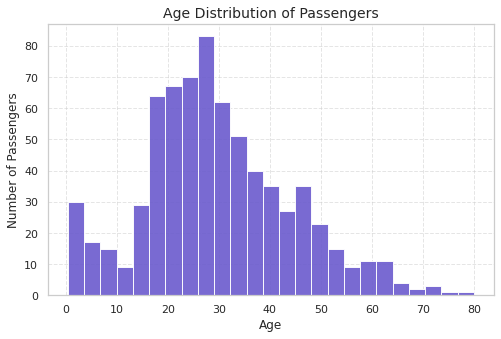

In [34]:
plt.figure(figsize=(8, 5))
plt.hist(data['Age'].dropna(), bins=25, color='#6a5acd', edgecolor='white', alpha=0.9)
plt.title('Age Distribution of Passengers', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## LINE PLOT 

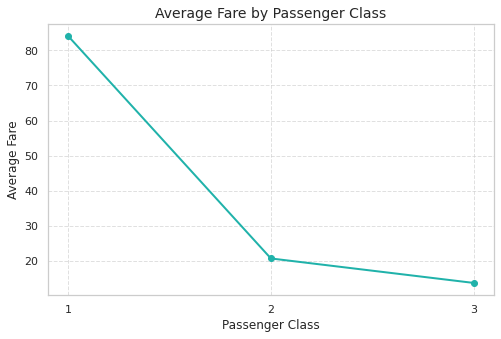

In [36]:
avg_fare = data.groupby('Pclass')['Fare'].mean()

plt.figure(figsize=(8, 5))
plt.plot(avg_fare.index, avg_fare.values, marker='o', color='#20B2AA', linewidth=2)
plt.title('Average Fare by Passenger Class', fontsize=14)
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare')
plt.xticks([1, 2, 3])
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## SCATER PLOT 

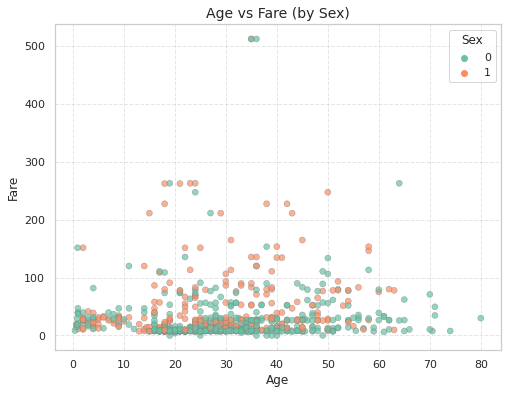

In [45]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Age', y='Fare', hue='Sex', palette='Set2', alpha=0.7, edgecolor='gray')
plt.title('Age vs Fare (by Sex)', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Sex')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()